In [ ]:
!pip install PyDistMesh

In [ ]:
from matplotlib import pyplot
from mpl_toolkits import mplot3d
import numpy
import scipy.spatial
import distmesh

**Julien VALENTIN**, **novembre 2021**

# Exploration de différentes méthodes de discrétisation de l'espace en Python.

## Maillages structurés uniformes de cavités rectangulaires

### 1.D

In [ ]:
a = 0.
b = 1.
if a > b : a, b = b, a
n = 8
d = (b-a)/n

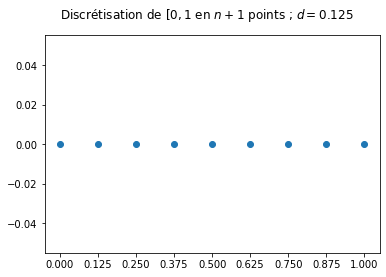

In [ ]:
Omega = numpy.linspace(a, b, n+1)

pyplot.scatter(Omega, numpy.zeros(Omega.shape))
pyplot.xticks(Omega)
pyplot.suptitle("Discrétisation de $[0,1$ en $n+1$ points ; $d = {}$".format(d))
pyplot.show()

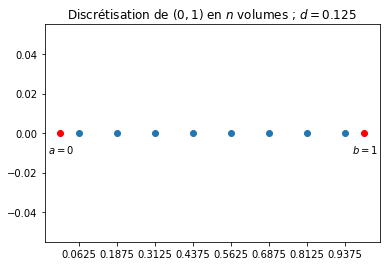

d/2 = 0.0625


In [ ]:
Omega = numpy.linspace(a+d/2, b-d/2, n)

pyplot.scatter(Omega, numpy.zeros(Omega.shape))
pyplot.scatter([a, b], numpy.zeros(2), color='red')
pyplot.text(a-.04, -.01, "$a=0$")
pyplot.text(b-.04, -.01, "$b=1$")
pyplot.xticks(Omega)
pyplot.title("Discrétisation de $(0,1)$ en $n$ volumes ; $d = {}$".format(d))
pyplot.show()

print("d/2 = {}".format(d/2))

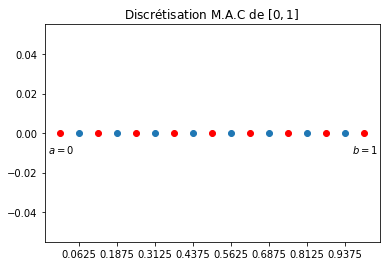

In [ ]:
Omega_c = numpy.linspace(a+d/2, b-d/2, n)
Omega_f = numpy.linspace(a, b, n+1)

pyplot.scatter(Omega_c, numpy.zeros_like(Omega_c))
pyplot.scatter(Omega_f, numpy.zeros_like(Omega_f), color='red')
pyplot.text(a-.04, -.01, "$a=0$")
pyplot.text(b-.04, -.01, "$b=1$")
pyplot.xticks(Omega_c)
pyplot.title("Discrétisation M.A.C de $[0,1]$")
pyplot.show()

### 2.D

In [ ]:
a, b = 0., 1.
nx = 8
dx = (b-a)/nx

c, d = 0., 1.
ny = 8
dy = (d-c)/ny

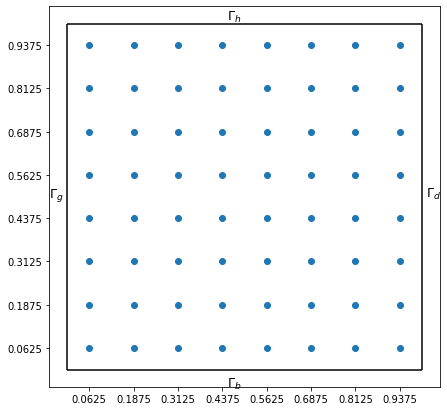

In [ ]:
I = numpy.linspace(a+dx/2, b-dx/2, nx)
J = numpy.linspace(c+dy/2, d-dy/2, ny)

Omega_x, Omega_y = numpy.meshgrid(I, J)

pyplot.figure(figsize=(7, 7))
pyplot.scatter(Omega_x, Omega_y)
pyplot.hlines(c, a, b)
pyplot.vlines(b, c, d)
pyplot.hlines(d, a, b)
pyplot.vlines(a, c, d)
pyplot.text((b-a)/2-.05, c-.05, "$\Gamma_b$", size=13)
pyplot.text(b+.01, (d-c)/2, "$\Gamma_d$", size=13)
pyplot.text((b-a)/2-.05, d+.01, "$\Gamma_h$", size=13)
pyplot.text(a-.05, (d-c)/2, "$\Gamma_g$", size=13)
pyplot.xticks(I)
pyplot.yticks(J)
pyplot.show()

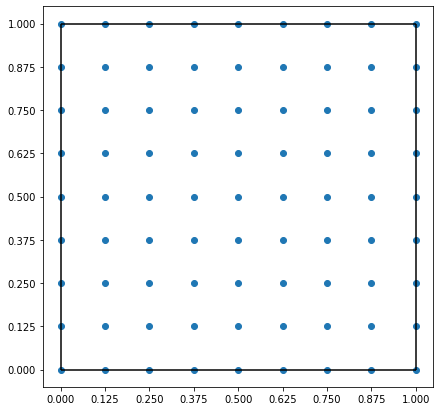

In [ ]:
I = numpy.linspace(a, b, nx+1)
J = numpy.linspace(c, d, ny+1)

Omega_x, Omega_y = numpy.meshgrid(I, J)

pyplot.figure(figsize=(7, 7))
pyplot.scatter(Omega_x, Omega_y)
pyplot.hlines(c, a, b)
pyplot.vlines(b, c, d)
pyplot.hlines(d, a, b)
pyplot.vlines(a, c, d)
pyplot.xticks(I)
pyplot.yticks(J)
pyplot.show()

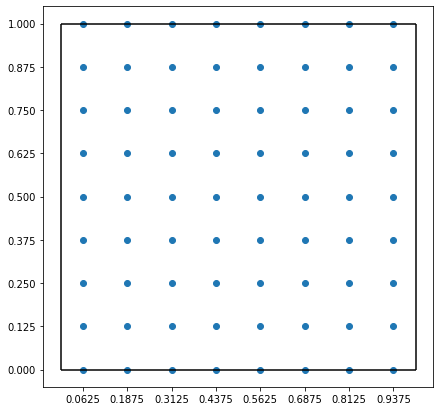

In [ ]:
I = numpy.linspace(a+dx/2, b-dx/2, nx)
J = numpy.linspace(c, d, ny+1)

Omega_x, Omega_y = numpy.meshgrid(I, J)

pyplot.figure(figsize=(7, 7))
pyplot.scatter(Omega_x, Omega_y)
pyplot.hlines(c, a, b)
pyplot.vlines(b, c, d)
pyplot.hlines(d, a, b)
pyplot.vlines(a, c, d)
pyplot.xticks(I)
pyplot.yticks(J)
pyplot.show()

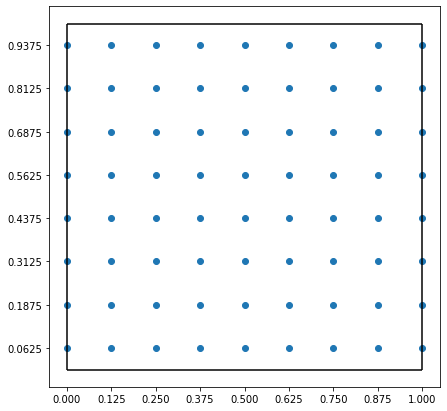

In [ ]:
I = numpy.linspace(a, b, nx+1)
J = numpy.linspace(c+dy/2, d-dy/2, ny)

Omega_x, Omega_y = numpy.meshgrid(I, J)

pyplot.figure(figsize=(7, 7))
pyplot.scatter(Omega_x, Omega_y)
pyplot.hlines(c, a, b)
pyplot.vlines(b, c, d)
pyplot.hlines(d, a, b)
pyplot.vlines(a, c, d)
pyplot.xticks(I)
pyplot.yticks(J)
pyplot.show()

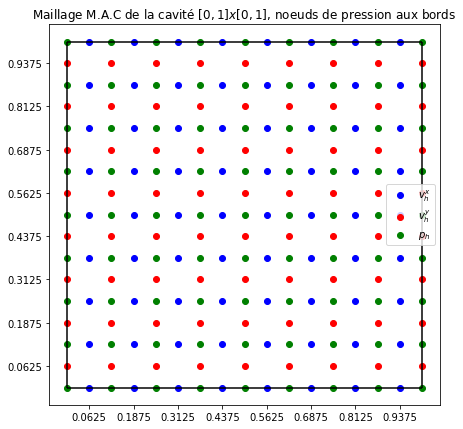

In [ ]:
I     = numpy.linspace(a+dx/2, b-dx/2, nx)
bar_I = numpy.linspace(a, b, nx+1)
J     = numpy.linspace(c+dy/2, d-dy/2, ny)
bar_J = numpy.linspace(c, d, ny+1)

vx_x, vx_y = numpy.meshgrid(I, bar_J)
vy_x, vy_y = numpy.meshgrid(bar_I, J)
p_x,  p_y  = numpy.meshgrid(bar_I, bar_J)

pyplot.figure(figsize=(7, 7))
pyplot.scatter(vx_x, vx_y, color='blue',  label="$v^x_h$")
pyplot.scatter(vy_x, vy_y, color='red',   label="$v^y_h$")
pyplot.scatter(p_x,  p_y,  color='green', label="$p_h$")
pyplot.hlines(c, a, b)
pyplot.vlines(b, c, d)
pyplot.hlines(d, a, b)
pyplot.vlines(a, c, d)
pyplot.legend(loc='best')
pyplot.title("Maillage M.A.C de la cavité $[0,1] x [0,1]$, noeuds de pression aux bords")
pyplot.xticks(I)
pyplot.yticks(J)
pyplot.show()

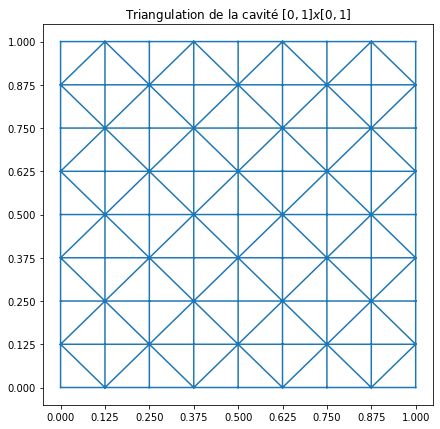

In [ ]:
I = numpy.linspace(a, b, nx+1)
J = numpy.linspace(c, d, ny+1)

Omega_x, Omega_y = numpy.meshgrid(I, J)
points = numpy.c_[Omega_x.ravel(), Omega_y.ravel()]
triangulation = scipy.spatial.Delaunay(points)

pyplot.figure(figsize=(7, 7))
pyplot.triplot(points[:, 0], points[:, 1], triangulation.simplices)
pyplot.title("Triangulation de la cavité $[0, 1]x[0,1]$")
pyplot.xticks(I)
pyplot.yticks(J)
pyplot.show()

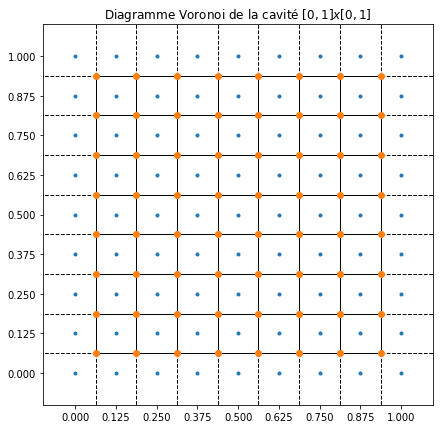

In [ ]:
I = numpy.linspace(a, b, nx+1)
J = numpy.linspace(c, d, ny+1)

Omega_x, Omega_y = numpy.meshgrid(I, J)
points = numpy.c_[Omega_x.ravel(), Omega_y.ravel()]

voronoi = scipy.spatial.Voronoi(points)

fig = scipy.spatial.voronoi_plot_2d(voronoi)
fig.set_figwidth(7)
fig.set_figheight(7)
pyplot.title("Diagramme Voronoi de la cavité $[0, 1]x[0,1]$")
pyplot.xticks(I)
pyplot.yticks(J)
pyplot.show()

### 3.D

In [ ]:
a = 0.
b = 1.
nx = 4
dx = (b-a)/nx
I     = numpy.linspace(a+dx/2, b-dx/2, nx)
bar_I = numpy.linspace(a, b, nx+1)

c = 0.
d = 1.
ny = 4
dy = (d-c)/ny
J     = numpy.linspace(c+dy/2, d-dy/2, ny)
bar_J = numpy.linspace(c, d, ny+1)

e = 0.
f = 1.
nz = 4
dz = (f-e)/nz
K     = numpy.linspace(e+dz/2, f-dz/2, nz)
bar_K = numpy.linspace(e, f, nz+1)

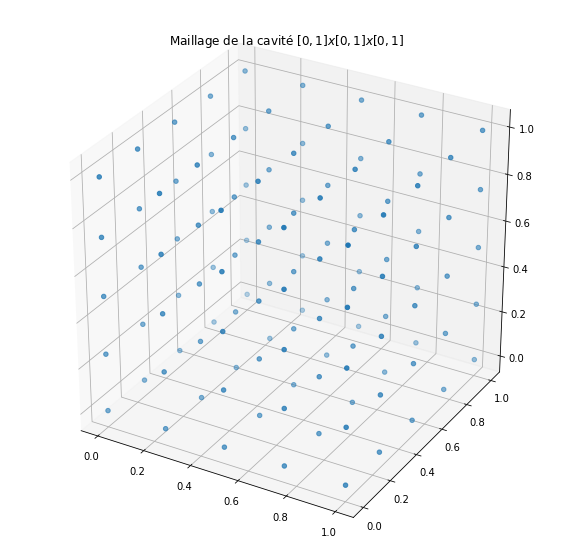

In [ ]:
Omega_x, Omega_y, Omega_z = numpy.meshgrid(bar_I, bar_J, bar_K)

figure = pyplot.figure(figsize = (10, 10))
axe    = pyplot.axes(projection ="3d")
axe.scatter3D(Omega_x, Omega_y, Omega_z)
pyplot.title("Maillage de la cavité $[0,1]x[0,1]x[0,1]$")
pyplot.show()

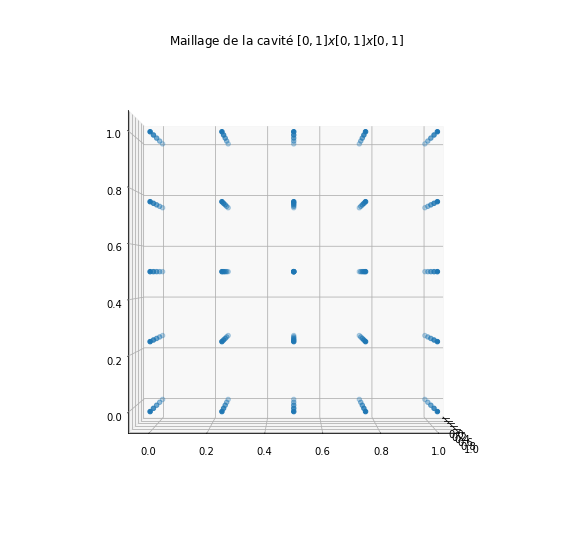

In [ ]:
figure = pyplot.figure(figsize = (10, 10))
axe    = pyplot.axes(projection ="3d")
axe.scatter3D(Omega_x, Omega_y, Omega_z)
axe.view_init(0, 0)
pyplot.title("Maillage de la cavité $[0,1]x[0,1]x[0,1]$")
pyplot.show()

## Exemples de triangulations avec [PyDistMesh](https://github.com/bfroehle/pydistmesh)

### Triangulation du disque unité

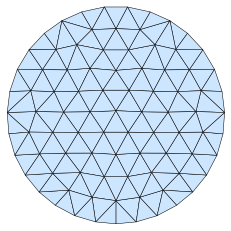

In [ ]:
fonction_distance = lambda point: numpy.sqrt((point**2).sum(1)) - 1.0
points, triangles = distmesh.distmesh2d(fonction_distance, distmesh.huniform, 0.2, (-1, -1, 1, 1))

In [ ]:
type(points)

numpy.ndarray

In [ ]:
type(triangles)

numpy.ndarray

In [ ]:
for point in points[:5] :
    print(point)

[0.448529   0.41519979]
[-0.99971936  0.02368974]
[-0.22093401  0.78635645]
[0.4812195  0.02702752]
[0.35947581 0.64734786]


In [ ]:
for triangle in triangles[:5] :
    print(triangle)

[ 9 15  7]
[15 18  7]
[10 11 29]
[78 10 29]
[10 78 13]


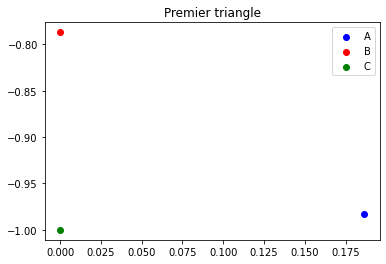

In [ ]:
triangle = triangles[0]

A = points[triangle[0]]
B = points[triangle[1]]
C = points[triangle[2]]

pyplot.scatter(A[0], A[1], color='blue' , label="A")
pyplot.scatter(B[0], B[1], color='red'  , label="B")
pyplot.scatter(C[0], C[1], color='green', label="C")
pyplot.legend(loc='best')
pyplot.title("Premier triangle")
pyplot.show()

### Triangulation d'une ellipse

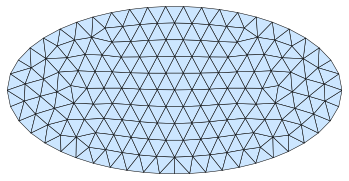

In [ ]:
fonction_distance = lambda point: point[:,0]**2/2**2 + point[:,1]**2/1**2 - 1

points, triangles = distmesh.distmesh2d(fonction_distance, distmesh.huniform, 0.2, (-2, -1, 2, 1))

### Triangulation d'un polygone arbitraire

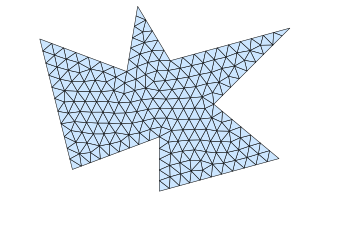

In [ ]:
pv = numpy.array([(-0.4,-0.5), (0.4,-0.2), (0.4,-0.7), (1.5,-0.4), (0.9,0.1), (1.6,0.8), (0.5,0.5), (0.2,1.0), (0.1,0.4), (-0.7,0.7), (-0.4,-0.5)])

fonction_distance = lambda point: distmesh.dpoly(point, pv)

points, triangles = distmesh.distmesh2d(fonction_distance, distmesh.huniform, .1, (-1, -1, 2, 1), pv)

### Triangulation d'un rectangle avec trou circulaire et raffinement autour des bords du cercle

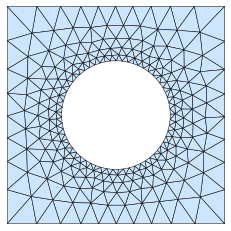

In [ ]:
fonction_distance = lambda point: distmesh.ddiff(distmesh.drectangle(point, -1, 1, -1, 1), distmesh.dcircle(point, 0, 0, 0.5))
fonction_echelle  = lambda point: 0.05+0.3*distmesh.dcircle(point, 0, 0, 0.5)

points, triangles = distmesh.distmesh2d(fonction_distance, fonction_echelle, 0.05, (-1, -1, 1, 1), [(-1,-1), (-1,1), (1,-1), (1,1)])

### Triangulation de la boule unité

In [ ]:
%%capture [--no-stderr]

fonction_distance = lambda point: numpy.sqrt((point**2).sum(1)) - 1.0

points, triangles = distmesh.distmeshnd(fonction_distance, distmesh.huniform, 0.2, (-1, -1, -1, 1, 1, 1), fig=None)

### Triangulation d'un cylindre avec un trou, 3.D

In [ ]:
%%capture [--no-stderr]

def fd10(p):
    "Fonction distance"
    r, z = numpy.sqrt(p[:,0]**2 + p[:,1]**2), p[:,2]
    d1, d2, d3 = r-1.0, z-1.0, -z-1.0
    d4, d5 = numpy.sqrt(d1**2+d2**2), numpy.sqrt(d1**2+d3**2)
    d = distmesh.dintersect(distmesh.dintersect(d1, d2), d3)
    ix = (d1>0)*(d2>0); d[ix] = d4[ix]
    ix = (d1>0)*(d3>0); d[ix] = d5[ix]
    return distmesh.ddiff(d, distmesh.dsphere(p, 0, 0, 0, 0.5))

def fh10(p):
    "Fonction échelle"
    h1 = 4*numpy.sqrt((p**2).sum(1))-1.0
    return numpy.minimum(h1, 2.0)

points, triangles = distmesh.distmeshnd(fd10, fh10, 0.1, (-1, -1, -1, 1, 1, 1), fig=None)